#**1. Loading the necessary libraries**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [23]:
import random

# Setting the seed
random.seed(42)
np.random.seed(42)


#**2. Loading the dataset into Colab**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_assignment1 (2).csv to dataset_assignment1 (2).csv


In [4]:
df = pd.read_csv('dataset_assignment1 (2).csv')

In [5]:
# pritning the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


***The above information of the data shows that there are no misssing values.***



#**3.Understanding the Data**

In [ ]:
# printing the first 5 rows
df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,featue9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
# Checking the classes
df['class'].value_counts()

0    459
1    241
Name: class, dtype: int64

**So, there are two unique classes.**

In [7]:
# Statistical description of data for class 0
df[df['class'] == 0].describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.0
mean,2.956427,1.324619,1.442266,1.363834,2.119826,1.437908,2.102397,1.289760,1.063181,0.0
std,1.672490,0.906830,0.996960,0.995886,0.916145,1.310839,1.079976,1.057787,0.501456,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,9.000000,8.000000,0.0


In [8]:
# Statistical description of data for class 1
df[df['class'] == 1].describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.195021,6.572614,6.560166,5.547718,5.298755,7.593361,5.979253,5.863071,2.589212,1.0
std,2.428849,2.719512,2.562045,3.210465,2.451606,3.129263,2.273852,3.350672,2.557939,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,1.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,1.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,10.000000,7.000000,10.000000,3.000000,1.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


<AxesSubplot:>

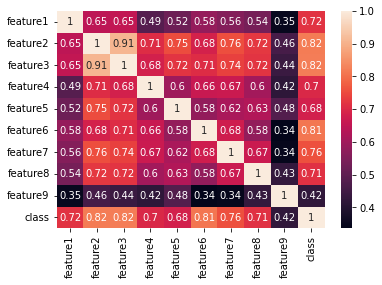

In [9]:
#Correlation
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot = True)

**There seems to be strong correlation between feature 2 and feature 3**

array([[<AxesSubplot:title={'center':'feature1'}>,
        <AxesSubplot:title={'center':'feature2'}>,
        <AxesSubplot:title={'center':'feature3'}>],
       [<AxesSubplot:title={'center':'feature4'}>,
        <AxesSubplot:title={'center':'feature5'}>,
        <AxesSubplot:title={'center':'feature6'}>],
       [<AxesSubplot:title={'center':'feature7'}>,
        <AxesSubplot:title={'center':'feature8'}>,
        <AxesSubplot:title={'center':'feature9'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

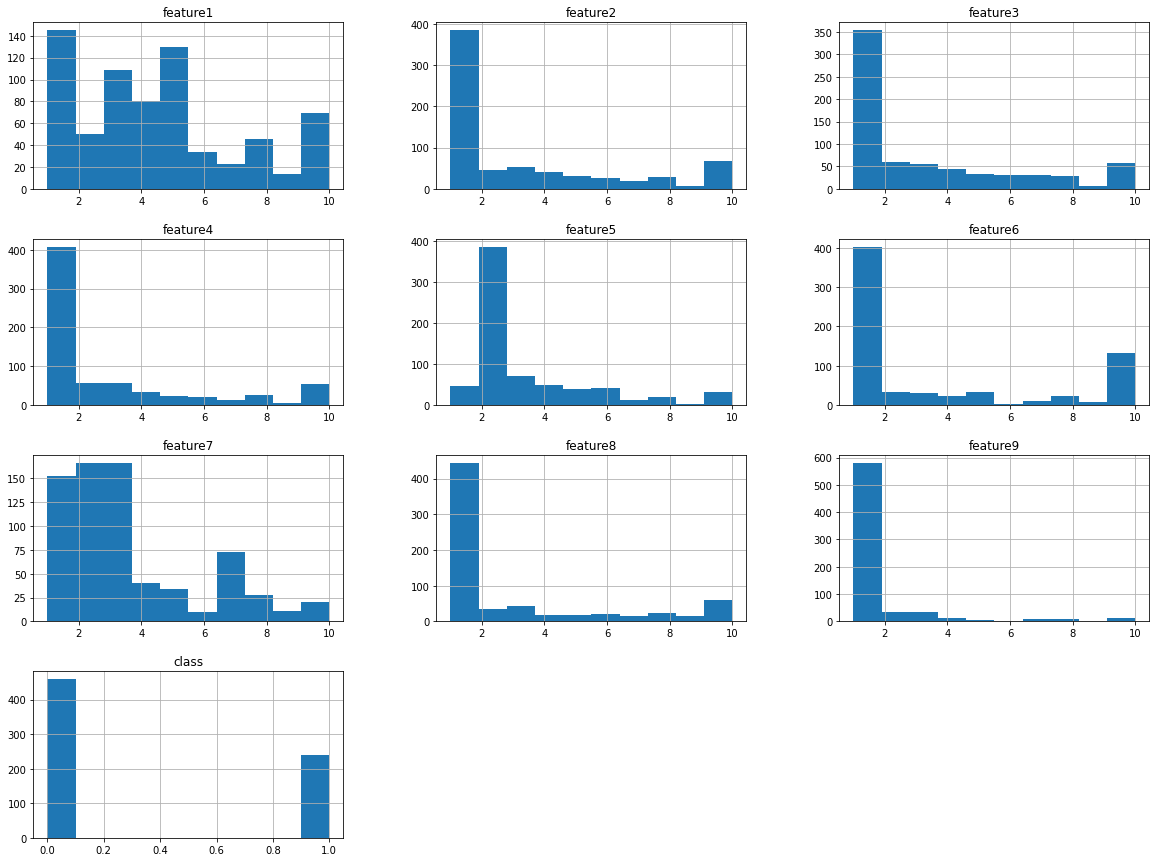

In [10]:
df.hist(bins = 10,figsize = (20,15))

#**4. Splitting the data into feature and target**

In [14]:
X = df.drop('class',axis = 1).copy()
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [15]:
y = df['class'].copy()
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: class, dtype: int64

In [16]:
# split the datset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [17]:
X_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
518,3,1,2,2,2,1,1,1,1
344,7,6,4,8,10,10,9,5,3
252,6,3,3,5,3,10,3,5,3
332,5,2,2,2,2,1,2,2,1
563,3,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
98,9,6,9,2,10,6,2,9,10
322,3,1,1,1,2,1,3,1,1
382,3,2,2,2,2,1,3,2,1
365,2,1,1,1,2,1,2,1,1


In [18]:
y_train

518    0
344    1
252    0
332    0
563    0
      ..
98     1
322    0
382    0
365    0
510    0
Name: class, Length: 560, dtype: int64

In [19]:
X_test

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
57,8,2,4,1,5,1,5,4,4
478,5,2,1,1,2,1,1,1,1
597,5,1,3,1,2,1,3,1,1
689,1,1,1,1,2,1,1,1,8
647,1,1,1,3,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
631,5,1,1,1,2,1,2,1,1
151,7,2,4,1,6,10,5,4,3
282,1,4,3,10,4,10,5,6,1
31,2,1,1,1,2,1,3,1,1


In [20]:
y_test

57     1
478    0
597    0
689    0
647    0
      ..
631    0
151    1
282    1
31     0
308    1
Name: class, Length: 140, dtype: int64

# **5. Classification Algorithm**

# Decision Tree

In [66]:
# Hyperparameters
dt_hyperparameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 8, 10, None],
    'min_samples_split' : [2, 4, 5, 10],
    'min_samples_leaf' : [1, 3, 5],
    'max_features' : ['sqrt', 'log2',None]
}

In [67]:
# Searching the best hyperparameters
dt_clf = DecisionTreeClassifier(random_state = 42)

search_dt = GridSearchCV(dt_clf,dt_hyperparameters,cv =10, scoring = ('accuracy','precision','recall','f1'),refit = False)

search_dt.fit(X_train,y_train)

# Converting results into dataframe
results_df_dt = pd.DataFrame(search_dt.cv_results_)[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]

In [68]:
# To increase size of column width
pd.set_option('max_colwidth', 800)

**Identifying the best hyperparameters on the basis of best accuracy**

In [70]:
results_df_dt.sort_values(['mean_test_accuracy'],ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10}
mean_test_accuracy                                                                                                                 0.95
mean_test_precision                                                                                                            0.931104
mean_test_recall                                                                                                               0.926316
mean_test_f1                                                                                                                    0.92522
Name: 335, dtype: object

**Applying the best hyperparameters on the testing dataset**

In [71]:
dt_clf_acc = DecisionTreeClassifier(criterion = 'entropy', max_depth =  8, max_features =  'sqrt', min_samples_leaf = 5, min_samples_split =  10, random_state = 42)

In [72]:
# Fitting the model
dt_clf_acc.fit(X_train,y_train)

# Predicting the value
y_pred = dt_clf_acc.predict(X_test)

In [73]:
#Accuracy
accuracy_score(y_test,y_pred)

0.9571428571428572

In [74]:
# Precision
precision_score(y_test,y_pred)

0.9782608695652174

In [75]:
# Recall
recall_score(y_test,y_pred)

0.9

In [76]:
# F1 score
f1_score(y_test,y_pred)

0.9375

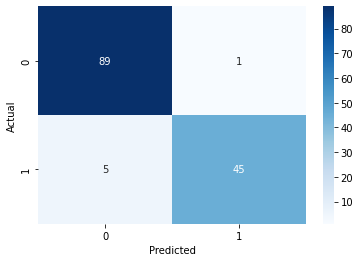

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Identifying the best hyperparameters on the basis of best precision**

In [78]:
results_df_dt.sort_values(['mean_test_precision'],ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10}
mean_test_accuracy                                                                                                                0.946429
mean_test_precision                                                                                                                0.93114
mean_test_recall                                                                                                                  0.915789
mean_test_f1                                                                                                                      0.920262
Name: 415, dtype: object

**Testing the above hyperparamters on the Testing Dataset**

In [36]:
dt_clf_pre = DecisionTreeClassifier(criterion = 'entropy', max_depth =  None, max_features =  'log2', min_samples_leaf = 3, min_samples_split =  10, random_state = 42)

In [37]:
# Fitting the Model
dt_clf_pre.fit(X_train,y_train)

# Predicting the values
y_pred = dt_clf_pre.predict(X_test)

In [38]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9714285714285714

In [39]:
# Precision
precision_score(y_test,y_pred)

0.9791666666666666

In [40]:
# Recall
recall_score(y_test,y_pred)

0.94

In [41]:
# F1
f1_score(y_test,y_pred)

0.9591836734693877

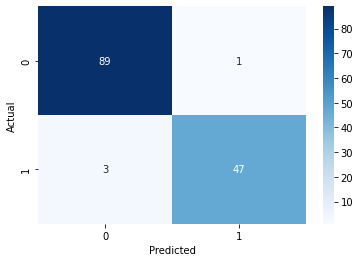

In [42]:
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 **Identifying the best hyperparameters on the basis of best recall**

In [79]:
results_df_dt.sort_values(['mean_test_recall'],ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
mean_test_accuracy                                                                                                          0.930357
mean_test_precision                                                                                                         0.857141
mean_test_recall                                                                                                            0.963158
mean_test_f1                                                                                                                0.905612
Name: 242, dtype: object

**Testing the above parameters on the Testing Dataset**

In [44]:
dt_clf_rec = DecisionTreeClassifier(criterion = 'entropy', max_depth =  3, max_features =  None, min_samples_leaf = 1, min_samples_split =  5, random_state = 42)

In [45]:
# Fitting the Model
dt_clf_rec.fit(X_train,y_train)

# Predicting the values
y_pred = dt_clf_rec.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9785714285714285

In [47]:
precision_score(y_test,y_pred)

0.9607843137254902

In [48]:
recall_score(y_test,y_pred)

0.98

In [49]:
f1_score(y_test,y_pred)

0.9702970297029702

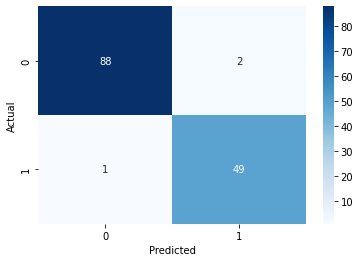

In [50]:
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Identifying the best hyperparameters on the basis of best f1 score**

In [55]:
results_df_dt.sort_values(['mean_test_f1'],ascending = False).iloc[0]

params                 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
mean_test_accuracy                                                                                                             0.95
mean_test_precision                                                                                                        0.914105
mean_test_recall                                                                                                           0.952632
mean_test_f1                                                                                                               0.930423
Name: 40, dtype: object

**Testing the above hyperparameters on Testing dataset**

In [56]:
dt_clf_f1 = DecisionTreeClassifier(criterion = 'gini', max_depth =  5, max_features =  'sqrt', min_samples_leaf = 3, min_samples_split =  2, random_state = 42)

In [58]:
# Fitting the Model
dt_clf_f1.fit(X_train,y_train)

# Predicting the values
y_pred = dt_clf_f1.predict(X_test)

In [59]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9857142857142858

In [60]:
# Precision
precision_score(y_test,y_pred)

0.98

In [61]:
# Recall
recall_score(y_test,y_pred)

0.98

In [62]:
# F1-score
f1_score(y_test,y_pred)

0.98

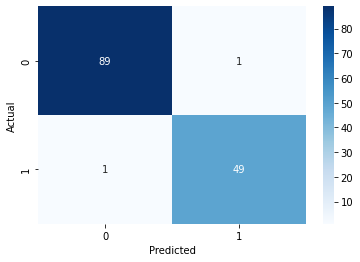

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Summarising the above results**

In [63]:
conclusion_df = pd.DataFrame([[0.9571428571428572,0.9782608695652174,0.9,0.9375],[0.9714285714285714,0.9791666666666666,0.94,0.9591836734693877],[0.9785714285714285,0.9607843137254902,0.98,0.9702970297029702],[0.9857142857142858,0.98,0.98,0.98]],
                             index = pd.Index(['criterion = entropy, max_depth = 8, max_features = sqrt, min_samples_leaf = 5, min_samples_split = 10' , 'criterion = entropy, max_depth =  None, max_features = log2, min_samples_leaf = 3, min_samples_split =  10', 'criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 1, min_samples_split = 5',	'criterion = gini, max_depth = 5, max_features = sqrt, min_samples_leaf = 3, min_samples_split =  2'],name = '-------------------------------------------------------------------------Hyperparameters :'),
                             columns = pd.MultiIndex.from_product([['Decision Trees'],['Accuracy','Precision','Recall','F1-score']],names=['------------------------------------------------------------------------------------Model:','-----------------------------------------------------------------------Evaluation Metrics:']))

In [64]:
conclusion_df

------------------------------------------------------------------------------------Model:                 Decision Trees  \
-----------------------------------------------------------------------Evaluation Metrics:                       Accuracy   
-------------------------------------------------------------------------Hyperparameters :                                  
criterion = entropy, max_depth = 8, max_features = sqrt, min_samples_leaf = 5, min_samples_split = 10            0.957143   
criterion = entropy, max_depth =  None, max_features = log2, min_samples_leaf = 3, min_samples_split =  10       0.971429   
criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 1, min_samples_split = 5             0.978571   
criterion = gini, max_depth = 5, max_features = sqrt, min_samples_leaf = 3, min_samples_split =  2               0.985714   

------------------------------------------------------------------------------------Model:                            \
-----------------------------------------------------------------------Evaluation Metrics:                 Precision   
-------------------------------------------------------------------------Hyperparameters :                             
criterion = entropy, max_depth = 8, max_features = sqrt, min_samples_leaf = 5, min_samples_split = 10       0.978261   
criterion = entropy, max_depth =  None, max_features = log2, min_samples_leaf = 3, min_samples_split =  10  0.979167   
criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 1, min_samples_split = 5        0.960784   
criterion = gini, max_depth = 5, max_features = sqrt, min_samples_leaf = 3, min_samples_split =  2          0.980000   

------------------------------------------------------------------------------------Model:                         \
-----------------------------------------------------------------------Evaluation Metrics:                 Recall   
-------------------------------------------------------------------------Hyperparameters :                          
criterion = entropy, max_depth = 8, max_features = sqrt, min_samples_leaf = 5, min_samples_split = 10        0.90   
criterion = entropy, max_depth =  None, max_features = log2, min_samples_leaf = 3, min_samples_split =  10   0.94   
criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 1, min_samples_split = 5         0.98   
criterion = gini, max_depth = 5, max_features = sqrt, min_samples_leaf = 3, min_samples_split =  2           0.98   

------------------------------------------------------------------------------------Model:                            
-----------------------------------------------------------------------Evaluation Metrics:                  F1-score  
-------------------------------------------------------------------------Hyperparameters :                            
criterion = entropy, max_depth = 8, max_features = sqrt, min_samples_leaf = 5, min_samples_split = 10       0.937500  
criterion = entropy, max_depth =  None, max_features = log2, min_samples_leaf = 3, min_samples_split =  10  0.959184  
criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 1, min_samples_split = 5        0.970297  
criterion = gini, max_depth = 5, max_features = sqrt, min_samples_leaf = 3, min_samples_split =  2          0.980000

# Random Forest

For the Random Forest Classifier, we are going to tune the following hyperparameters:


1.  **n_estimators**

> It specifies the number of trees in a forest. Obviously, increasing the number of trees in the forest will imporve the performance of the model but if the forest becomes very large we start getting diminishing returns.


2.   **max_features**


> It represents the number of feature we should consider while splitting at each node.

3. **max_depth**


> It specifies the maximum depth of the decision tree, the depth of the decision tree is defined as the number of nodes from the root to the farthest leaf. If its value is high, the tree will be more deep and complex and becomes more prone to overfitting the training data.

4. **min_samples_split**


> It determines the minimum number of samples required to split a node into further sub-nodes. Low value of it, may leads to overfitting.

5. **min_samples_leaf**

> It determines the minimum number of samples required to be at a leaf node. Low value of it, may lead to overfitting.

6. **criterion**


> It determines the function used to measure the quality of the split while building tree.


















In [80]:
# Hyperparameters 
rf_hyperparameters = {
    'n_estimators' : [50,100,200],
    'max_features' : ['sqrt', 'log2',None],
    'max_depth': [3,5,8,None],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf' : [2,3,5,8],
    'criterion': ['gini','entropy']  
}

In [81]:
# Searching for the best hyperparameters
rf_clf = RandomForestClassifier(n_jobs = -1, random_state=42)

search_rf = GridSearchCV(estimator = rf_clf,param_grid = rf_hyperparameters,cv = 10, scoring = ('accuracy','precision','recall','f1'),refit = False)

search_rf.fit(X_train,y_train)

results_df_rf = pd.DataFrame(search_rf.cv_results_)[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]


**Finding the best hyperparameters on the basis of best accuracy**

In [82]:
results_df_rf.sort_values('mean_test_accuracy',ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
mean_test_accuracy                                                                                                                                    0.966071
mean_test_precision                                                                                                                                   0.939076
mean_test_recall                                                                                                                                      0.968421
mean_test_f1                                                                                                                                           0.95246
Name: 1013, dtype: object

**Testing the above hyperparameters on the Testing Dataset**

In [83]:
rf_clf_acc = RandomForestClassifier(criterion='entropy',max_depth = None,max_features = 'sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators = 200,random_state = 42)

In [84]:
# Fitting the model
rf_clf_acc.fit(X_train,y_train)

# Predicting the model
y_pred = rf_clf_acc.predict(X_test)

In [85]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9928571428571429

In [86]:
# Precision
precision_score(y_test,y_pred)

1.0

In [87]:
# Recall
recall_score(y_test,y_pred)

0.98

In [88]:
# F1 score
f1_score(y_test,y_pred)

0.98989898989899

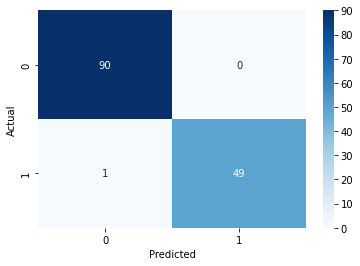

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Find the best hyperparamters on the basis of best precision**

In [90]:
results_df_rf.sort_values('mean_test_precision',ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100}
mean_test_accuracy                                                                                                                                   0.9625
mean_test_precision                                                                                                                                0.943307
mean_test_recall                                                                                                                                   0.952632
mean_test_f1                                                                                                                                       0.946646
Name: 871, dtype: object

**Using the hyperparameters on the testing dataset**


In [91]:
rf_clf_prec = RandomForestClassifier(criterion='entropy',max_depth = 8,max_features = 'sqrt',min_samples_leaf=2,min_samples_split=7,n_estimators = 100, random_state = 42)

In [92]:
# Fitting the Model
rf_clf_prec.fit(X_train,y_train)

# Predicting 
y_pred = rf_clf_prec.predict(X_test)

In [93]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9928571428571429

In [94]:
# Precision
precision_score(y_test,y_pred)

1.0

In [95]:
# Recall
recall_score(y_test,y_pred)

0.98

In [96]:
# F1 score
f1_score(y_test,y_pred)

0.98989898989899

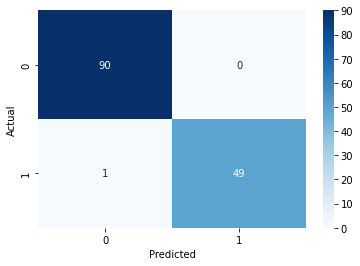

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Find the best hyperparamters on the basis of best recall**

In [98]:
results_df_rf.sort_values('mean_test_recall',ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
mean_test_accuracy                                                                                                                              0.964286
mean_test_precision                                                                                                                             0.925728
mean_test_recall                                                                                                                                0.978947
mean_test_f1                                                                                                                                    0.950677
Name: 675, dtype: object

**Using the above hyperparamters on the Testing dataset**

In [99]:
rf_clf_rec = RandomForestClassifier(criterion='entropy',max_depth = 3,max_features = None,min_samples_leaf=2,min_samples_split=5,n_estimators = 50,random_state = 42)

In [100]:
# Fitting the model
rf_clf_rec.fit(X_train,y_train)

# Predicting the value
y_pred = rf_clf_rec.predict(X_test)

In [101]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9785714285714285

In [102]:
# Precision
precision_score(y_test,y_pred)

0.9795918367346939

In [103]:
# Recall
recall_score(y_test,y_pred)

0.96

In [104]:
# F1 score
f1_score(y_test,y_pred)

0.9696969696969697

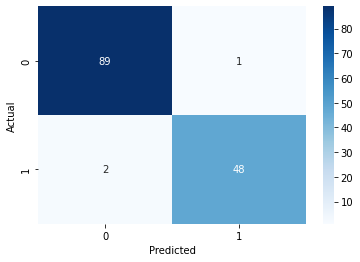

In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Find the best hyperparamters on the basis of best f1-score**

In [106]:
results_df_rf.sort_values('mean_test_f1',ascending = False).iloc[0]

params                 {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 50}
mean_test_accuracy                                                                                                                              0.966071
mean_test_precision                                                                                                                             0.934364
mean_test_recall                                                                                                                                0.973684
mean_test_f1                                                                                                                                    0.952727
Name: 678, dtype: object

**Using the above hyperparameters on the testing dataset**

In [107]:
rf_clf_f1 = RandomForestClassifier(criterion='entropy',max_depth = 3,max_features = None,min_samples_leaf=2,min_samples_split=7,n_estimators = 50,random_state = 42)

In [108]:
# Fitting the model
rf_clf_f1.fit(X_train,y_train)

# Predicting 
y_pred = rf_clf_f1.predict(X_test)

In [109]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9785714285714285

In [110]:
# Precision
precision_score(y_test,y_pred)

0.9795918367346939

In [111]:
# Recall
recall_score(y_test,y_pred)

0.96

In [112]:
# F1 score
f1_score(y_test,y_pred)

0.9696969696969697

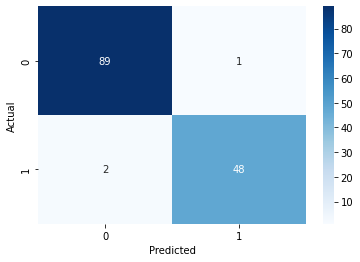

In [113]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Summarising the results**

In [29]:
conclusion_df = pd.DataFrame([[0.9928571428571429,1.0,0.98,0.98989898989899],[0.9928571428571429,1.0,0.98,0.98989898989899],[0.9785714285714285,0.9795918367346939,0.96,0.9696969696969697],[0.9785714285714285,0.9795918367346939,0.96,0.9696969696969697]],
                             index = pd.Index(['criterion = entropy, max_depth = None, max_features = sqrt, min_samples_leaf = 2, min_samples_split = 5, n_estimates = 200' , 'criterion = entropy, max_depth =  8, max_features = sqrt, min_samples_leaf = 2, min_samples_split =  7,n_estimators = 100', 'criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 2, min_samples_split = 5,n_estimators = 50',	'criterion = entropy, max_depth = 3, max_features = None, min_samples_leaf = 2, min_samples_split =  7,n_estimators = 50'],name = '----------------------------------------------------------------------------------Hyperparameters :'),
                             columns = pd.MultiIndex.from_product([['Random Forest'],['Accuracy','Precision','Recall','F1']],names=['---------------------------------------------------------------------------------------------Model:','--------------------------------------------------------------------------------Evaluation Metrics:']))

In [30]:
conclusion_df

---------------------------------------------------------------------------------------------Model: Random Forest  \
--------------------------------------------------------------------------------Evaluation Metrics:      Accuracy   
-----------------------------------------------...                                                                  
criterion = entropy, max_depth = None, max_feat...                                                       0.992857   
criterion = entropy, max_depth =  8, max_featur...                                                       0.992857   
criterion = entropy, max_depth = 3, max_feature...                                                       0.978571   
criterion = entropy, max_depth = 3, max_feature...                                                       0.978571   

---------------------------------------------------------------------------------------------Model:            \
--------------------------------------------------------------------------------Evaluation Metrics: Precision   
-----------------------------------------------...                                                              
criterion = entropy, max_depth = None, max_feat...                                                   1.000000   
criterion = entropy, max_depth =  8, max_featur...                                                   1.000000   
criterion = entropy, max_depth = 3, max_feature...                                                   0.979592   
criterion = entropy, max_depth = 3, max_feature...                                                   0.979592   

---------------------------------------------------------------------------------------------Model:         \
--------------------------------------------------------------------------------Evaluation Metrics: Recall   
-----------------------------------------------...                                                           
criterion = entropy, max_depth = None, max_feat...                                                    0.98   
criterion = entropy, max_depth =  8, max_featur...                                                    0.98   
criterion = entropy, max_depth = 3, max_feature...                                                    0.96   
criterion = entropy, max_depth = 3, max_feature...                                                    0.96   

---------------------------------------------------------------------------------------------Model:            
--------------------------------------------------------------------------------Evaluation Metrics:        F1  
-----------------------------------------------...                                                             
criterion = entropy, max_depth = None, max_feat...                                                   0.989899  
criterion = entropy, max_depth =  8, max_featur...                                                   0.989899  
criterion = entropy, max_depth = 3, max_feature...                                                   0.969697  
criterion = entropy, max_depth = 3, max_feature...                                                   0.969697

# KNN

In [114]:
# Hyperparameters
knn_hyperparameters = {
   'n_neighbors': [3,5,7,10,13],
   'weights': ['uniform','distance'],
   'p':[1,2]
}

In [115]:
# searching the best hyperparameters
knn_clf = KNeighborsClassifier(n_jobs = -1)

search_knn = GridSearchCV(estimator = knn_clf,param_grid = knn_hyperparameters,cv = 10, scoring = ('accuracy','precision','recall','f1'),refit = False)

search_knn.fit(X_train,y_train)

results_df_knn = pd.DataFrame(search_knn.cv_results_)[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']]


**Finding the best hyperparamters on the basis of accuracy**

In [116]:
results_df_knn.sort_values('mean_test_accuracy',ascending = False).iloc[0]

params                 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
mean_test_accuracy                                              0.966071
mean_test_precision                                             0.943834
mean_test_recall                                                0.963158
mean_test_f1                                                    0.952182
Name: 5, dtype: object

**Using the above hyperparameters on Testing dataset**

In [117]:
knn_clf_acc = KNeighborsClassifier(n_neighbors = 5, p = 1,weights = 'distance')

# Fitting the Model
knn_clf_acc.fit(X_train,y_train)

# Predicting
y_pred = knn_clf_acc.predict(X_test)

In [118]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9785714285714285

In [119]:
# Precision
precision_score(y_test,y_pred)

1.0

In [120]:
# Recall
recall_score(y_test,y_pred)

0.94

In [121]:
# f1-score
f1_score(y_test,y_pred)

0.9690721649484536

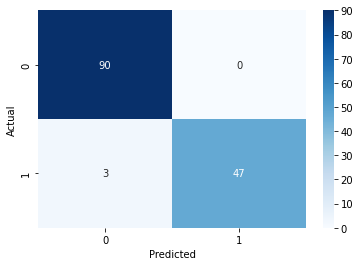

In [122]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Finding the best hyperparamters on the basis of precision**

In [123]:
results_df_knn.sort_values('mean_test_precision',ascending = False).iloc[0]

params                 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
mean_test_accuracy                                                 0.9625
mean_test_precision                                              0.951582
mean_test_recall                                                 0.942105
mean_test_f1                                                     0.945724
Name: 13, dtype: object

**Using the above hyperparameters on Testing dataset**

In [124]:
knn_clf_pre = KNeighborsClassifier(n_neighbors = 10, p = 1,weights = 'distance')

# Fitting the model
knn_clf_pre.fit(X_train,y_train)

# Predicting 
y_pred = knn_clf_pre.predict(X_test)

In [125]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9785714285714285

In [126]:
# Precision
precision_score(y_test,y_pred)

1.0

In [127]:
# Recall
recall_score(y_test,y_pred)

0.94

In [128]:
# f1 score
f1_score(y_test,y_pred)

0.9690721649484536

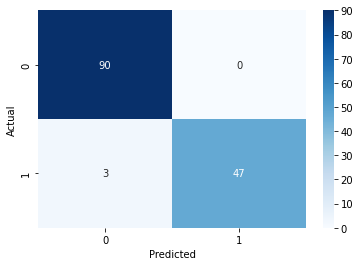

In [129]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Finding the best hyperparamters on the basis of recall**

In [130]:
results_df_knn.sort_values('mean_test_recall',ascending = False).iloc[0]

params                 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
mean_test_accuracy                                             0.966071
mean_test_precision                                            0.944221
mean_test_recall                                               0.963158
mean_test_f1                                                   0.952139
Name: 6, dtype: object

**Using the hyperparameters on the testing dataset**

In [131]:
knn_clf_rec = KNeighborsClassifier(n_neighbors = 5, p = 2,weights = 'uniform')

# Fitting the Model
knn_clf_rec.fit(X_train,y_train)

# Predict
y_pred = knn_clf_rec.predict(X_test)

In [132]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9928571428571429

In [133]:
# Precision
precision_score(y_test,y_pred)

1.0

In [134]:
# Recall
recall_score(y_test,y_pred)

0.98

In [135]:
# F1 score
f1_score(y_test,y_pred)

0.98989898989899

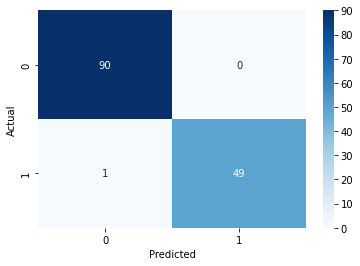

In [136]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Finding the best hyperparamters on the basis of f1_score**

In [137]:
results_df_knn.sort_values('mean_test_f1',ascending = False).iloc[0]

params                 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
mean_test_accuracy                                              0.966071
mean_test_precision                                             0.943834
mean_test_recall                                                0.963158
mean_test_f1                                                    0.952182
Name: 5, dtype: object

**Using the hyperparamters on Testing dataset**

In [138]:
knn_clf_f1 = KNeighborsClassifier(n_neighbors = 5, p = 1,weights = 'distance')

# Fitting the model
knn_clf_f1.fit(X_train,y_train)

# Predict
y_pred = knn_clf_f1.predict(X_test)

In [139]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9785714285714285

In [140]:
# Precision
precision_score(y_test,y_pred)

1.0

In [141]:
# Recall
recall_score(y_test,y_pred)

0.94

In [142]:
# F1 score
f1_score(y_test,y_pred)

0.9690721649484536

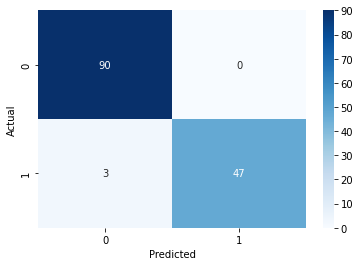

In [143]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
sns.heatmap(cm,annot = True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Summarizing the results**

In [144]:
conclusion_df = pd.DataFrame([[0.9785714285714285,1.0,0.94,0.9690721649484536],[0.9785714285714285,1.0,0.94,0.9690721649484536],[0.9928571428571429,1.0,0.98,0.98989898989899],[0.9785714285714285,1.0,0.94,0.9690721649484536]],
                             index = pd.Index(['n_neighbors = 5, p = 1,weights = distance' , 'n_neighbors = 10, p = 1,weights = distance', 'n_neighbors = 5, p = 2,weights = uniform',	'n_neighbors = 5, p = 1,weights = distance'],name = '----------------------------------------------------------------------------------Hyperparameters :'),
                             columns = pd.MultiIndex.from_product([['K Nearest Neighbour'],['Accuracy','Precision','Recall','F1']],names=['---------------------------------------------------------------------------------------------Model:','--------------------------------------------------------------------------------Evaluation Metrics:']))

In [145]:
conclusion_df

---------------------------------------------------------------------------------------------Model: K Nearest Neighbour  \
--------------------------------------------------------------------------------Evaluation Metrics:            Accuracy   
----------------------------------------------------------------------------------Hyperparameters :                       
n_neighbors = 5, p = 1,weights = distance                                                                      0.978571   
n_neighbors = 10, p = 1,weights = distance                                                                     0.978571   
n_neighbors = 5, p = 2,weights = uniform                                                                       0.992857   
n_neighbors = 5, p = 1,weights = distance                                                                      0.978571   

---------------------------------------------------------------------------------------------Model:            \
--------------------------------------------------------------------------------Evaluation Metrics: Precision   
----------------------------------------------------------------------------------Hyperparameters :             
n_neighbors = 5, p = 1,weights = distance                                                                 1.0   
n_neighbors = 10, p = 1,weights = distance                                                                1.0   
n_neighbors = 5, p = 2,weights = uniform                                                                  1.0   
n_neighbors = 5, p = 1,weights = distance                                                                 1.0   

---------------------------------------------------------------------------------------------Model:         \
--------------------------------------------------------------------------------Evaluation Metrics: Recall   
----------------------------------------------------------------------------------Hyperparameters :          
n_neighbors = 5, p = 1,weights = distance                                                             0.94   
n_neighbors = 10, p = 1,weights = distance                                                            0.94   
n_neighbors = 5, p = 2,weights = uniform                                                              0.98   
n_neighbors = 5, p = 1,weights = distance                                                             0.94   

---------------------------------------------------------------------------------------------Model:            
--------------------------------------------------------------------------------Evaluation Metrics:        F1  
----------------------------------------------------------------------------------Hyperparameters :            
n_neighbors = 5, p = 1,weights = distance                                                            0.969072  
n_neighbors = 10, p = 1,weights = distance                                                           0.969072  
n_neighbors = 5, p = 2,weights = uniform                                                             0.989899  
n_neighbors = 5, p = 1,weights = distance                                                            0.969072

We are getting best accuracy and f1 score for the same set of hyperparameters.